In [1]:
# https://youtu.be/qB6h5CohLbs
"""
2 ways to load HAM10000 dataset for skin cancer lesion classification
Dataset link:
https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
Data description: 
https://arxiv.org/ftp/arxiv/papers/1803/1803.10417.pdf

The 7 classes of skin cancer lesions included in this dataset are:
Melanocytic nevi (nv)
Melanoma (mel)
Benign keratosis-like lesions (bkl)
Basal cell carcinoma (bcc) 
Actinic keratoses (akiec)
Vascular lesions (vas)
Dermatofibroma (df)
"""

'\n2 ways to load HAM10000 dataset for skin cancer lesion classification\nDataset link:\nhttps://www.kaggle.com/kmader/skin-cancer-mnist-ham10000\nData description: \nhttps://arxiv.org/ftp/arxiv/papers/1803/1803.10417.pdf\n\nThe 7 classes of skin cancer lesions included in this dataset are:\nMelanocytic nevi (nv)\nMelanoma (mel)\nBenign keratosis-like lesions (bkl)\nBasal cell carcinoma (bcc) \nActinic keratoses (akiec)\nVascular lesions (vas)\nDermatofibroma (df)\n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [3]:
###########################################
#METHOD 1: Read files using file name from the csv and add corresponding 
#image in a pandas dataframe along with labels. 
#This requires lot of memory to hold all thousands of images. 
#Use datagen if you run into memory issues. 

In [4]:
skin_df = pd.read_csv('/Users/stageacomeback/Desktop/HAM10000/data/HAM10000/HAM10000_metadata.csv')

In [7]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/Users/stageacomeback/Desktop/HAM10000/data/', '*', '*.jpg'))}

In [8]:
#Define the path and add as a new column
skin_df['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

In [9]:
print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


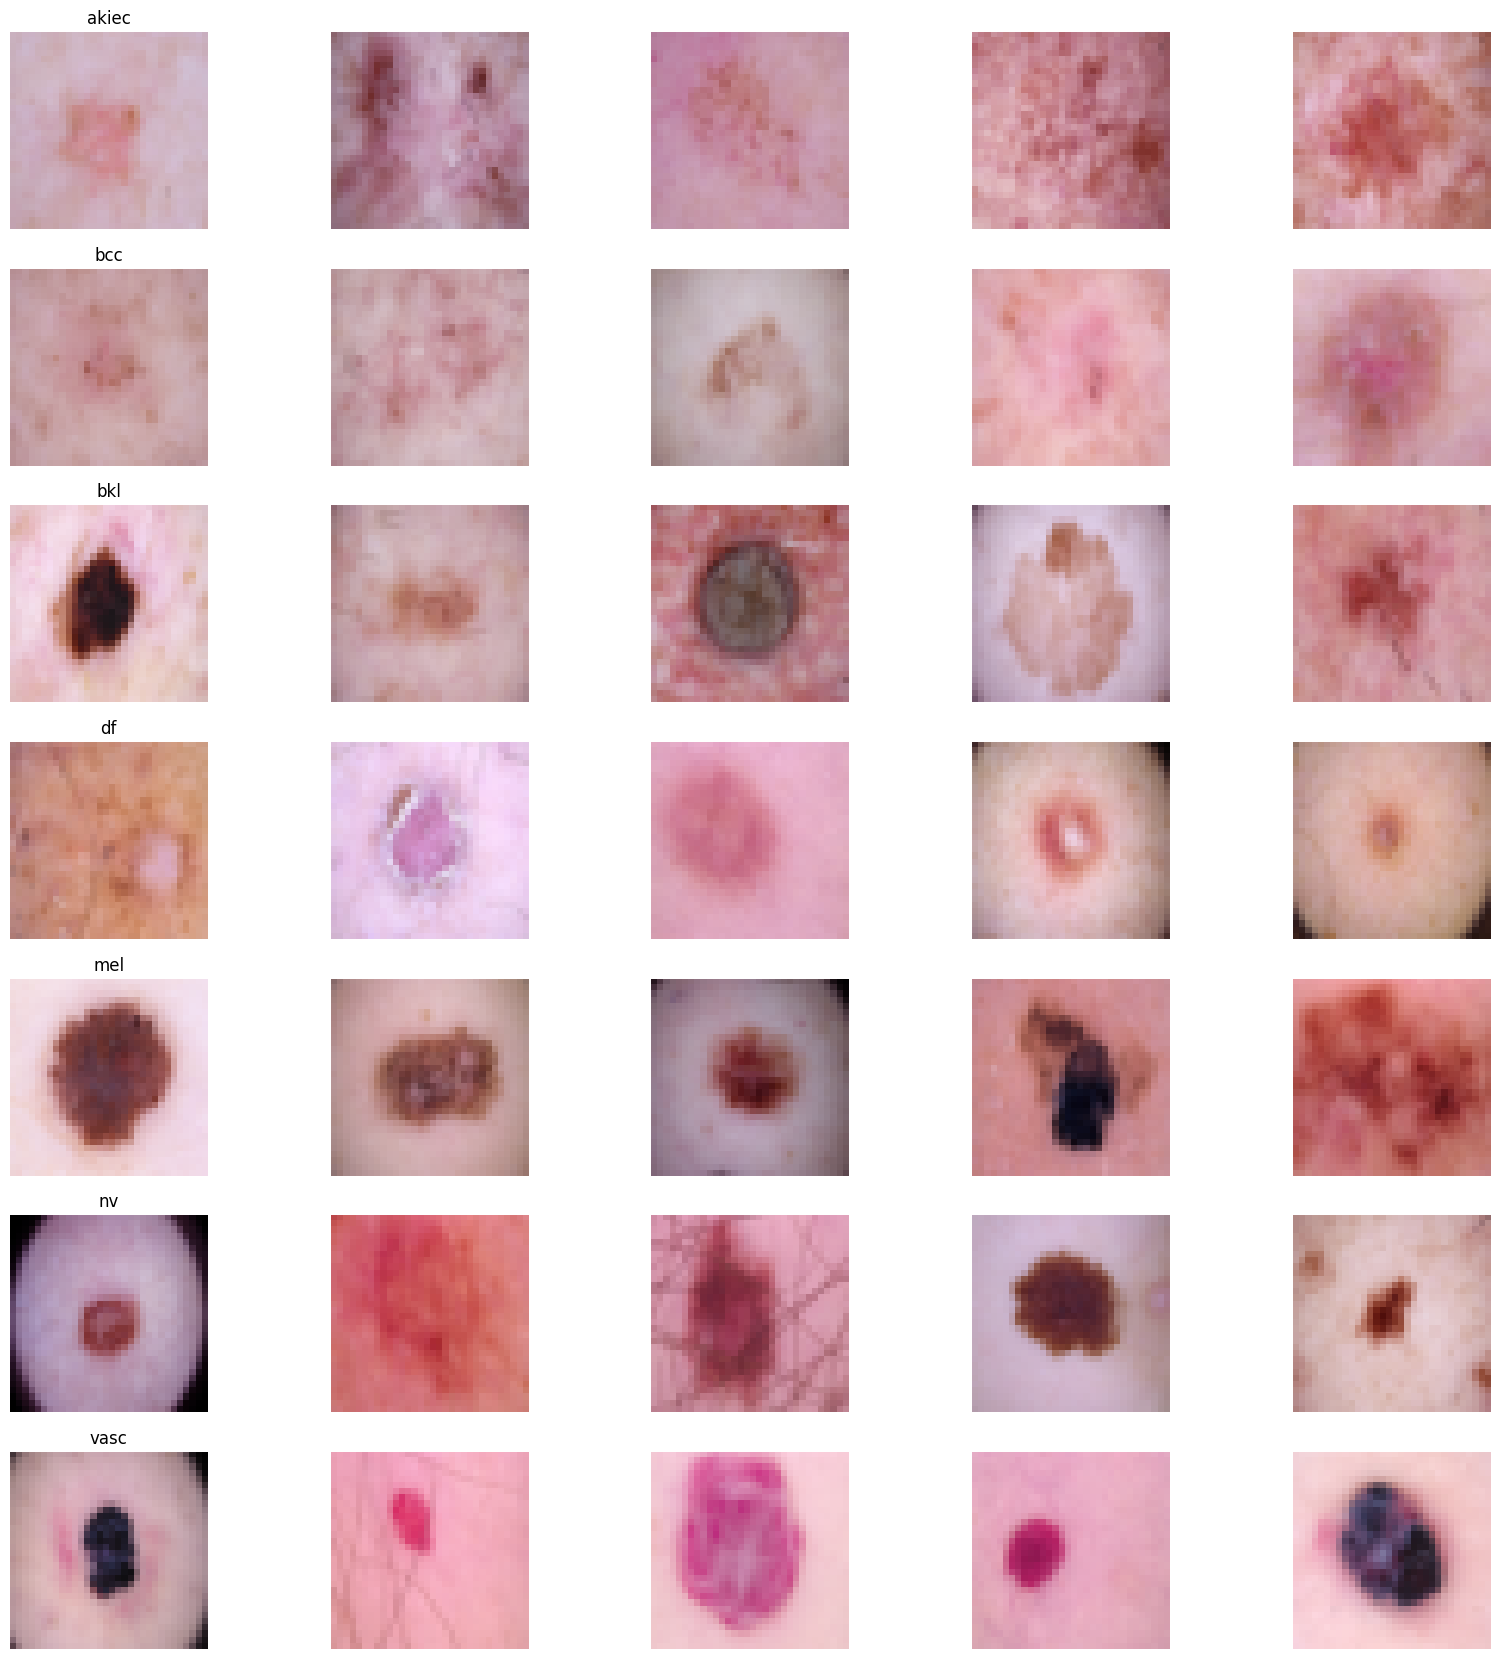

In [10]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
#############################################################################
# Reorganize data into subfolders based on their labels
#then use keras flow_from_dir or pytorch ImageFolder to read images with 
#folder names as labels

In [11]:
#Sort images to subfolders first 
import pandas as pd
import os
import shutil

In [12]:
# Dump all images into a folder and specify the path:
data_dir = "/Users/stageacomeback/Desktop/HAM10000/data/all_images/"

In [13]:
# Path to destination directory where we want subfolders
dest_dir = "/Users/stageacomeback/Desktop/HAM10000/data/reorganized/"

In [14]:
# Read the csv file containing image names and corresponding labels
skin_df2 = pd.read_csv('/Users/stageacomeback/Desktop/HAM10000/data/HAM10000/HAM10000_metadata.csv')
print(skin_df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [15]:
label=skin_df2['dx'].unique().tolist()  #Extract labels into a list
label_images = []
label_images

[]

In [33]:
# Copy images to new folders
#for i in label:
#    os.mkdir(dest_dir + str(i) + "/")
#    sample = skin_df2[skin_df2['dx'] == i]['image_id']
#    label_images.extend(sample)
#    for id in label_images:
#        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
#    label_images=[]  

In [17]:
#Now we are ready to work with images in subfolders
    
### FOR Keras datagen ##################################
#flow_from_directory Method
#useful when the images are sorted and placed in there respective class/label folders
#identifies classes automatically from the folder name. 
# create a data generator

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt

In [20]:
#Define datagen. Here we can define any transformations we want to apply to images
datagen = ImageDataGenerator()

In [21]:
# define training directory that contains subfolders
train_dir = "/Users/stageacomeback/Desktop/HAM10000/data/reorganized/"
#USe flow_from_directory
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,  #16 images at a time
                                         target_size=(32,32))  #Resize images

Found 10015 images belonging to 7 classes.


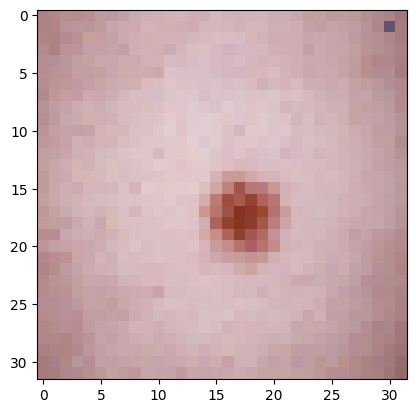

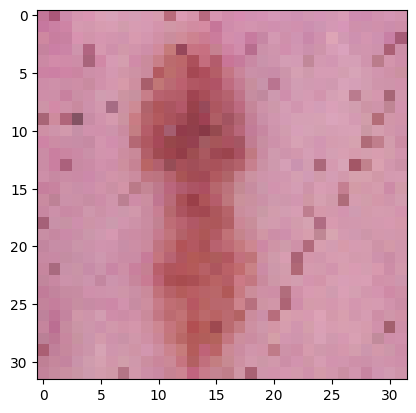

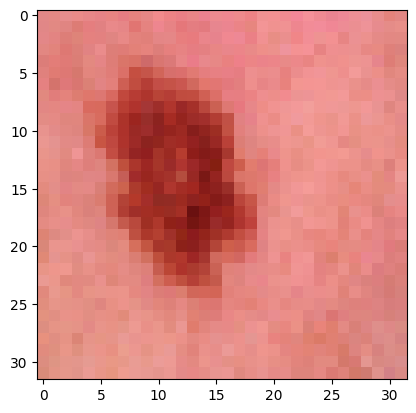

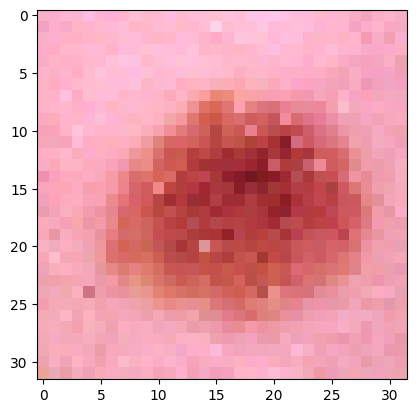

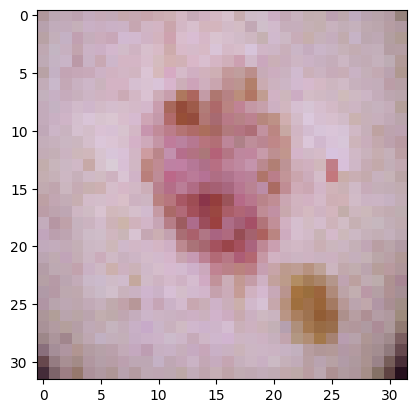

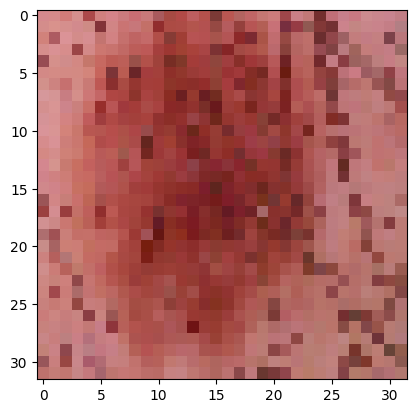

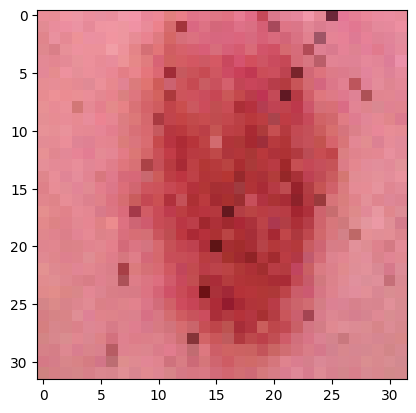

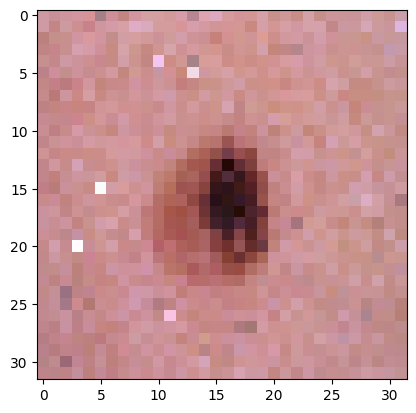

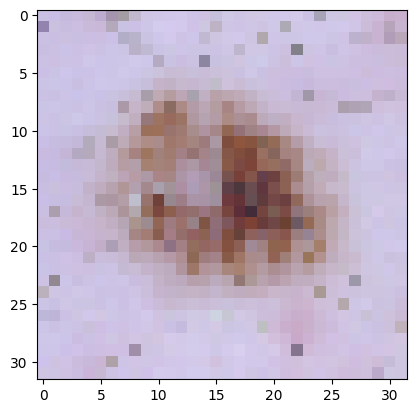

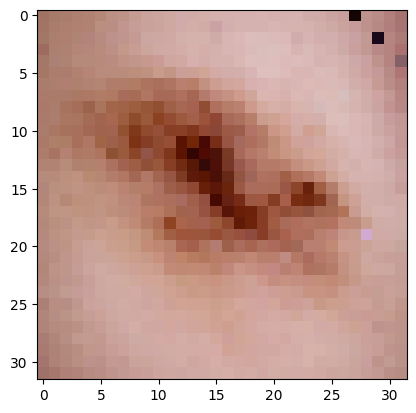

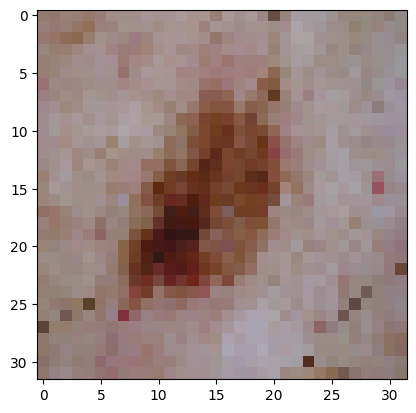

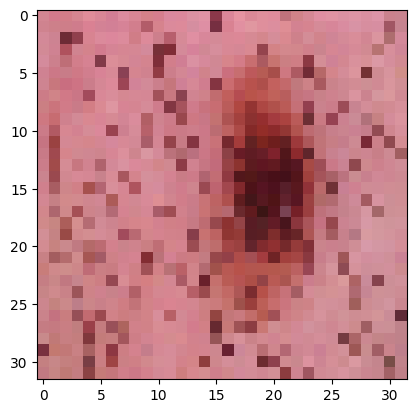

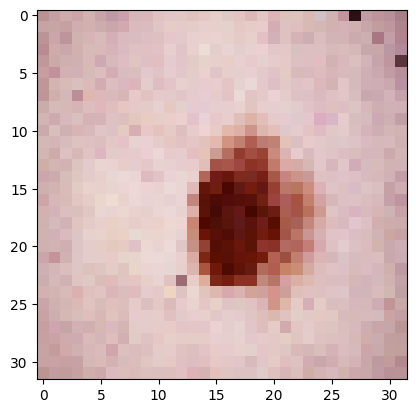

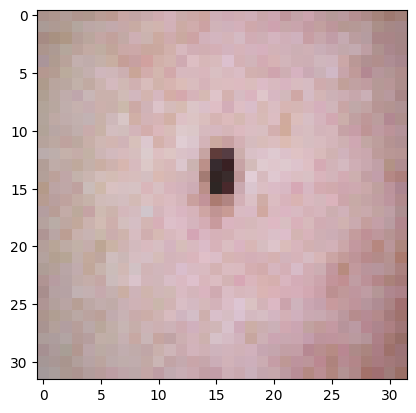

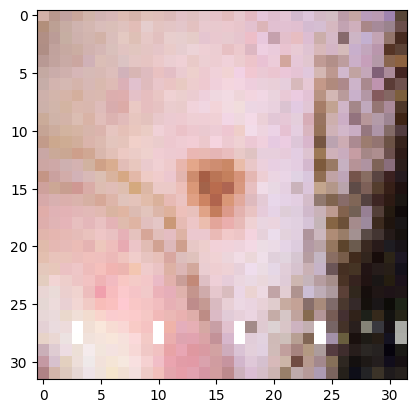

In [22]:
#We can check images for a single batch.
x, y = next(train_data_keras)
#View each image
for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()

In [23]:
#Now you can train via model.fit_generator

In [26]:
##################################################################################
### Similarly FOR PYTORCH we can use DataLoader
import torchvision
from torchvision import transforms
import torch.utils.data as data
import numpy as np

In [28]:
#Define root directory with subdirectories
train_dir = "/Users/stageacomeback/Desktop/HAM10000/data/reorganized/"

In [29]:
#If you want to apply ransforms
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),       # Converts your input image to PyTorch tensor.
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5] )
    ])

In [30]:
#With transforms
#train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
#Without transforms
train_data_torch = torchvision.datasets.ImageFolder(root=train_dir)
#train_data_loader_torch = data.DataLoader(train_data_torch, batch_size=len(train_data_torch))

In [31]:
print("Number of train samples: ", len(train_data_torch))    
print("Detected Classes are: ", train_data_torch.class_to_idx) # classes are detected by folder structure 

Number of train samples:  10015
Detected Classes are:  {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [32]:
labels = np.array(train_data_torch.targets)
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0  327]
 [   1  514]
 [   2 1099]
 [   3  115]
 [   4 1113]
 [   5 6705]
 [   6  142]]


In [34]:
x

array([[[[171., 131., 131.],
         [177., 135., 136.],
         [183., 143., 144.],
         ...,
         [175., 136., 139.],
         [171., 132., 137.],
         [161., 121., 122.]],

        [[171., 131., 132.],
         [177., 133., 134.],
         [186., 147., 150.],
         ...,
         [174., 133., 139.],
         [ 99.,  83., 112.],
         [165., 124., 130.]],

        [[174., 132., 134.],
         [173., 131., 132.],
         [181., 138., 145.],
         ...,
         [181., 142., 147.],
         [174., 133., 139.],
         [164., 125., 130.]],

        ...,

        [[169., 129., 130.],
         [173., 131., 132.],
         [175., 133., 134.],
         ...,
         [172., 130., 132.],
         [164., 122., 123.],
         [159., 115., 116.]],

        [[164., 122., 123.],
         [168., 127., 133.],
         [175., 135., 135.],
         ...,
         [166., 125., 131.],
         [162., 122., 123.],
         [150., 108., 110.]],

        [[167., 123., 124.],
       

In [35]:
y

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [36]:
# The Codes are run by Python 3.13.1